In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

In [4]:
train_data_dir = 'day_night/training'
test_data_dir = 'day_night/test'

In [6]:
os.path.join(train_data_dir, 'day', '*')

'day_night/training\\day\\*'

In [7]:
def load_dataset(path):
    images = []
    types = ['day', 'night']
    for i in types:
        for img_path in glob.glob(os.path.join(path, i, '*')):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            images.append((img, i))
    return images

In [8]:
train_images = load_dataset(train_data_dir)

In [9]:
train_images

[(array([[[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [176, 209, 228],
          [177, 210, 229],
          [177, 210, 229]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [180, 213, 232],
          [180, 213, 232],
          [180, 213, 232]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [177, 210, 229],
          [177, 210, 229],
          [177, 210, 229]],
  
         ...,
  
         [[ 35,  40,  43],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 65,  73,  75],
          [ 65,  73,  75],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 68,  76,  78],
          [ 68,  76,  78],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47

In [10]:
len(train_images)

240

In [16]:
def show_images(images, rows, cols):
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.title(f"{i+1} - image")
        plt.imshow(images[i][0])
    plt.show()

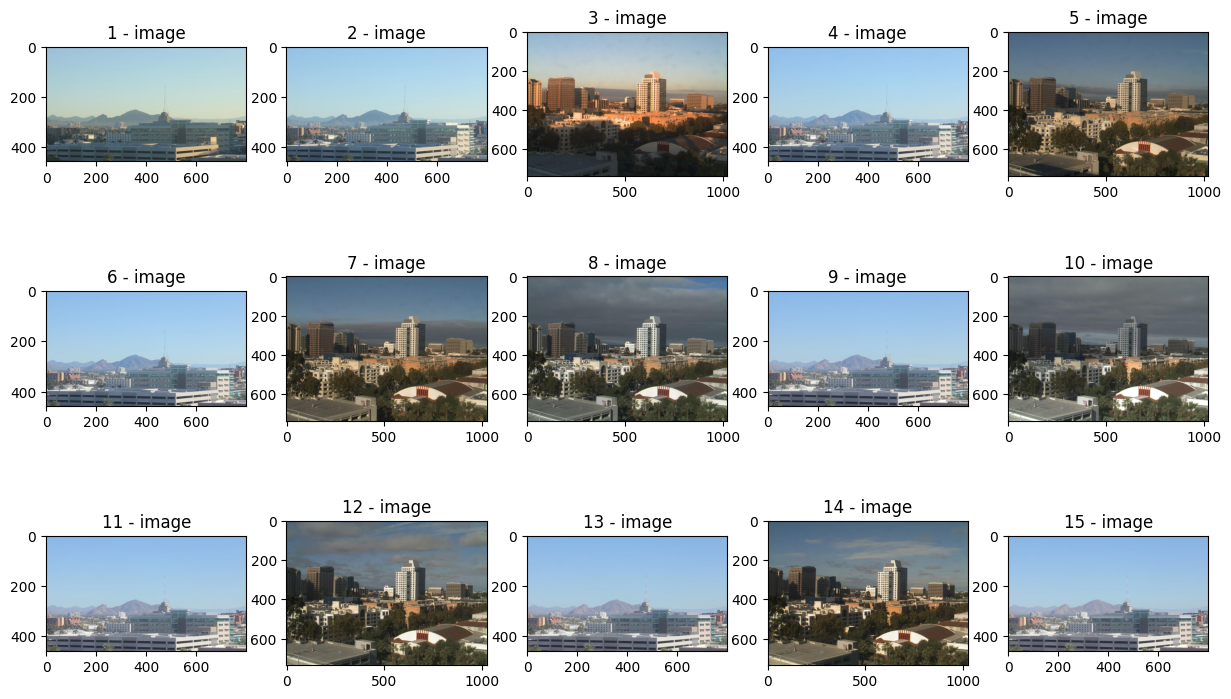

In [19]:
plt.figure(figsize=(15, 9))
show_images(train_images, 3, 5)

# RESIZE

<b>INTER_NEAREST - a nearest-neighbor interpolation
INTER_LINEAR - a bilinear interpolation (used by default)
INTER_AREA - resampling using pixel area relation.
INTER_CUBIC - a bicubic interpolation over 4x4 pixel neighborhood
INTER_LANCZOS4 - a Lanczos interpolation over 8x8 pixel neighborhood

In [20]:
sample_img = np.random.randint(0, 10,  size=(8, 8), dtype=np.uint8)

[[9 5 4 1 7 8 1 3]
 [3 7 8 5 9 6 2 8]
 [2 0 9 8 3 6 7 3]
 [3 5 3 1 2 8 4 4]
 [5 4 5 2 1 3 0 9]
 [2 8 6 5 0 2 2 7]
 [2 9 4 9 9 1 6 1]
 [8 4 3 1 1 1 6 4]]


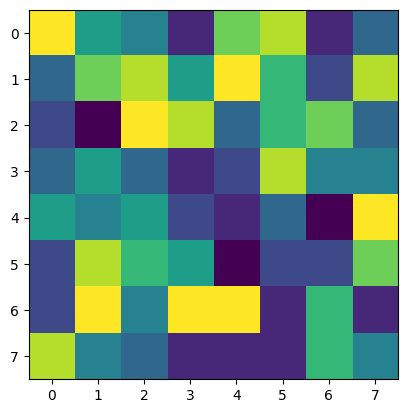

In [25]:
plt.imshow(sample_img)
print(sample_img)
plt.show()

[[9 4 7 1]
 [2 9 3 7]
 [5 5 1 0]
 [2 4 9 6]]


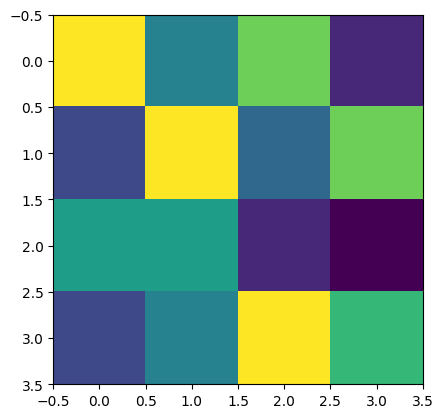

In [26]:
resized_img = cv2.resize(sample_img, (4, 4), interpolation=cv2.INTER_NEAREST)
print(resized_img)
plt.imshow(resized_img)
plt.show()

[[6 5 8 4]
 [3 5 5 5]
 [5 5 2 5]
 [6 4 3 4]]


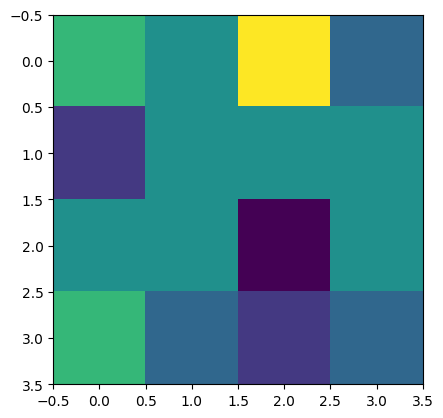

In [27]:
resized_img = cv2.resize(sample_img, (4, 4), interpolation=cv2.INTER_LINEAR)
print(resized_img)
plt.imshow(resized_img)
plt.show()

[[6 5 8 4]
 [3 5 5 5]
 [5 5 2 5]
 [6 4 3 4]]


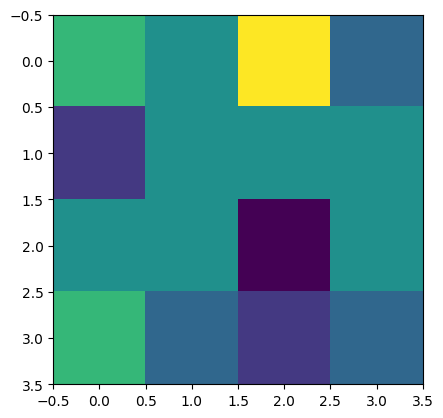

In [28]:
resized_img = cv2.resize(sample_img, (4, 4), interpolation=cv2.INTER_AREA)
print(resized_img)
plt.imshow(resized_img)
plt.show()

[[6 4 9 3]
 [2 6 5 4]
 [5 5 1 4]
 [6 4 3 5]]


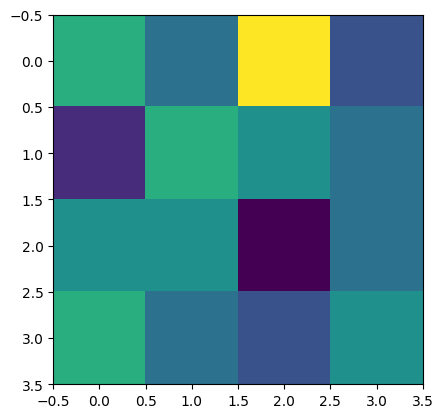

In [29]:
resized_img = cv2.resize(sample_img, (4, 4), interpolation=cv2.INTER_CUBIC)
print(resized_img)
plt.imshow(resized_img)
plt.show()

[[10  9  6  4  4  3  1  2  5  8  9  7  2  0  2  3]
 [ 8  7  6  5  5  4  2  3  6  8  8  6  2  1  3  5]
 [ 4  5  7  8  7  6  4  5  8  9  8  5  2  2  6  8]
 [ 2  3  4  7  8  9  7  7  8  8  7  5  3  4  6  8]
 [ 2  1  0  3  8 10  9  7  5  4  5  6  6  6  5  4]
 [ 2  1  0  2  6  8  8  5  3  3  5  7  8  6  4  2]
 [ 2  3  3  4  4  4  3  2  2  4  7  8  6  4  3  3]
 [ 4  4  5  5  4  2  1  0  1  3  6  7  4  3  5  6]
 [ 5  5  4  4  4  4  2  1  1  2  4  4  1  2  6  9]
 [ 5  5  5  5  6  5  4  2  1  1  2  2  0  2  7 10]
 [ 2  4  6  7  7  6  5  3  0  0  1  2  1  3  7  9]
 [ 1  3  7  9  7  6  7  6  3  2  1  2  3  4  5  6]
 [ 0  3  8  9  6  5  8  9  9  6  2  2  4  5  3  2]
 [ 3  5  7  7  4  4  6  8  9  6  2  2  5  6  2  0]
 [ 7  6  6  5  4  3  3  3  3  2  1  2  5  6  4  3]
 [ 9  7  5  3  3  2  1  0  0  0  0  2  5  6  5  4]]


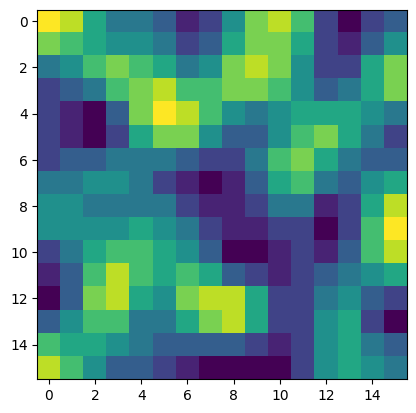

In [30]:
resized_img = cv2.resize(sample_img, (16, 16), interpolation=cv2.INTER_CUBIC)
print(resized_img)
plt.imshow(resized_img)
plt.show()

[[9 8 6 5 4 3 2 2 5 7 8 6 3 1 2 3]
 [8 7 6 5 5 4 3 3 6 7 7 6 3 2 3 4]
 [5 5 6 6 7 6 5 5 7 8 7 5 3 3 5 7]
 [3 3 5 6 7 7 6 6 7 7 6 5 4 4 6 7]
 [2 2 2 3 7 8 7 7 5 5 5 6 6 5 5 4]
 [2 2 1 3 6 7 6 5 3 4 5 6 6 6 4 3]
 [3 3 3 4 4 4 3 2 2 3 6 7 5 5 4 4]
 [4 4 4 4 4 3 2 1 2 3 5 6 4 4 5 5]
 [5 4 4 4 4 4 2 2 1 2 3 3 2 3 6 8]
 [4 4 5 5 5 4 3 2 1 1 2 2 1 2 6 9]
 [3 4 6 7 6 5 4 3 1 1 2 2 2 3 6 8]
 [2 3 7 7 6 6 6 5 3 2 2 2 3 3 5 6]
 [2 4 7 8 5 5 7 8 7 5 3 2 4 4 3 3]
 [4 5 7 7 5 4 6 7 7 6 3 2 5 5 3 2]
 [7 6 6 5 4 3 3 3 3 3 2 2 5 5 4 3]
 [8 7 5 4 3 2 1 1 1 1 1 2 5 5 4 4]]


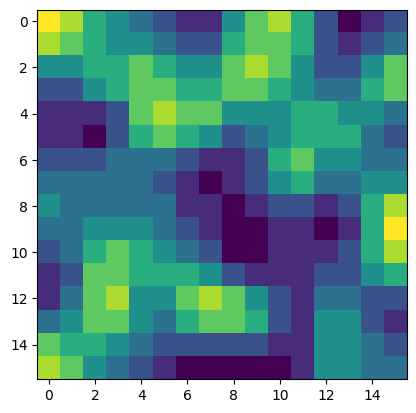

In [31]:
resized_img = cv2.resize(sample_img, (16, 16), interpolation=cv2.INTER_LINEAR)
print(resized_img)
plt.imshow(resized_img)
plt.show()

# Method tanlash

In [32]:
# Kattalashtirmoqchi bo'lsak - LINEAR, CUBIC
# Kichiklashtirmoqchi bo'lsak - AREA

# DAY and Night ni davomi

In [33]:
train_data_dir = 'day_night/training'
test_data_dir = 'day_night/test'

In [34]:
def load_dataset(path):
    images = []
    types = ['day', 'night']
    for i in types:
        for img_path in glob.glob(os.path.join(path, i, '*')):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            images.append((img, i))
    return images

In [35]:
train_images = load_dataset(train_data_dir)

In [36]:
test_images = load_dataset(test_data_dir)

In [37]:
len(train_images) + len(test_images)

400

In [38]:
train_images.extend(test_images)

In [39]:
len(train_images)

400

In [40]:
train_images

[(array([[[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [176, 209, 228],
          [177, 210, 229],
          [177, 210, 229]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [180, 213, 232],
          [180, 213, 232],
          [180, 213, 232]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [177, 210, 229],
          [177, 210, 229],
          [177, 210, 229]],
  
         ...,
  
         [[ 35,  40,  43],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 65,  73,  75],
          [ 65,  73,  75],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 68,  76,  78],
          [ 68,  76,  78],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47

In [41]:
x_size = [i[0].shape[1] for i in train_images]
y_size = [i[0].shape[0] for i in train_images]

In [42]:
x_size

[800,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 800,
 1024,
 1024,
 640,
 640,
 800,
 640,
 800,
 640,
 640,
 640,
 800,
 1280,
 640,
 1280,
 640,
 1280,
 1280,
 1280,
 640,
 1280,
 800,
 640,
 1280,
 640,
 1280,
 1280,
 1280,
 800,
 1280,
 640,
 1280,
 640,
 1280,
 1280,
 1280,
 640,
 1280,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 800,
 640,
 640,
 800,
 640,
 640,
 800,
 640,
 640,
 800,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 640,
 1280,
 800,
 1280,
 800,
 1280,
 800,
 640,
 1280,
 800,
 800,
 800,
 800,
 640,
 640,
 640,
 640,
 640,
 640,
 857,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 640,
 640,
 640,
 800,
 640,
 640,
 800,
 800,
 640,
 857,
 800,
 800,
 640,
 857,
 800,
 800,
 640,
 857,
 800,
 640,
 857,
 800,
 857,
 800,
 800,
 800,
 800,
 

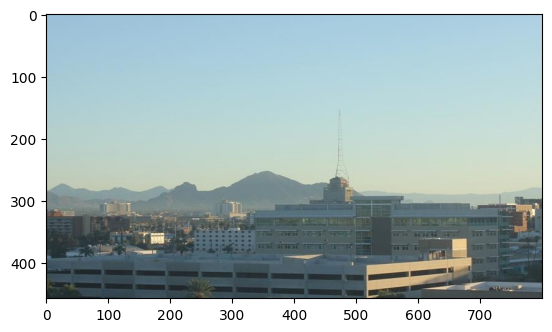

In [44]:
plt.imshow(train_images[0][0])
plt.show()

In [45]:
np.mean(y_size)

568.1525

In [46]:
np.mean(x_size)

856.0675

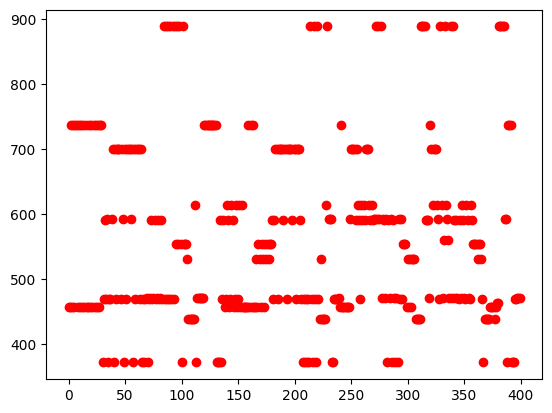

In [52]:
plt.scatter(np.arange(400), y_size, color='r')
plt.show()

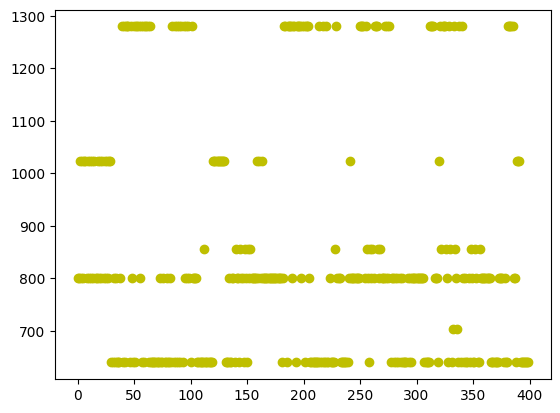

In [53]:
plt.scatter(np.arange(400), x_size, color='y')
plt.show()

# Dataset ni bir xil o'lchamga olib kelish

In [59]:
def same(img):
    img = cv2.resize(img, dsize=(860, 570))
    return img

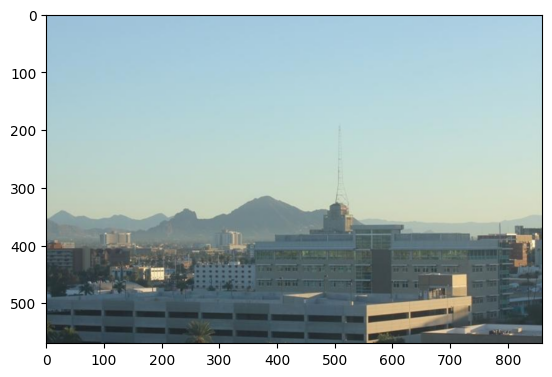

In [60]:
img = same(train_images[0][0])
plt.imshow(img)
plt.show()

In [61]:
def encode(target):
    if target=='day':
        return 1
    return 0

In [63]:
encode(train_images[0][1]), train_images[0][1]

(1, 'day')

In [64]:
def preprocessing(images):
    result_images = []
    for img in images:
        result_images.append((same(img[0]), encode(img[1])))
    return result_images

In [65]:
result_images = preprocessing(train_images)

In [66]:
result_images

[(array([[[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [176, 209, 228],
          [177, 210, 229],
          [177, 210, 229]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [179, 212, 231],
          [179, 212, 231],
          [179, 212, 231]],
  
         [[158, 194, 218],
          [158, 194, 218],
          [158, 194, 218],
          ...,
          [178, 211, 230],
          [178, 211, 230],
          [178, 211, 230]],
  
         ...,
  
         [[ 35,  40,  43],
          [ 38,  43,  45],
          [ 39,  44,  47],
          ...,
          [ 66,  74,  76],
          [ 66,  74,  76],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47],
          ...,
          [ 68,  76,  78],
          [ 67,  76,  78],
          [ 65,  73,  75]],
  
         [[ 36,  41,  44],
          [ 38,  43,  46],
          [ 39,  44,  47

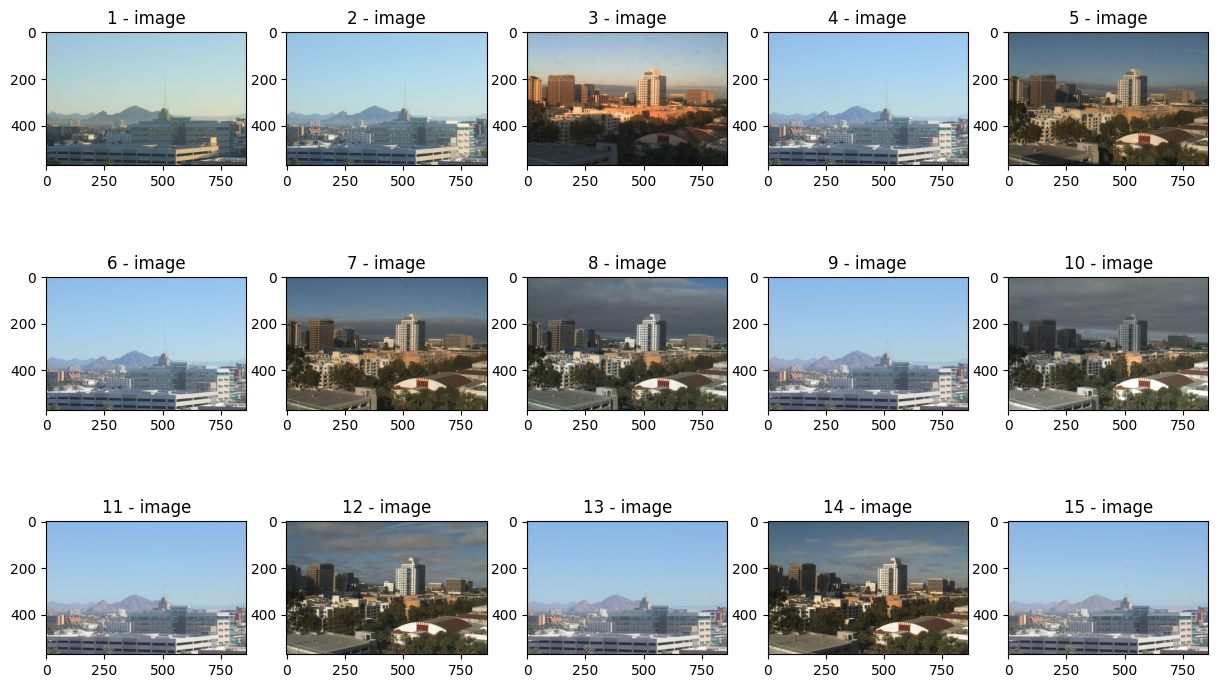

In [68]:
plt.figure(figsize=(15, 9))
show_images(result_images, 3, 5)